# Ceres - Hello World

In [1]:
import sys
sys.path.append('../build/Debug/')
import numpy as np
import libhello_world as hello_world

This example implements a python and numpy wrapper for the example found in `helloworld.cc` in the `ceres` examples at https://ceres-solver.googlesource.com/ceres-solver/+/master/examples/helloworld.cc.

The example optimize the residual $$ r = 10 - x $$ using autodifferentiation.

The cost function used is
```c++
struct CostFunctor {
  template <typename T>
  bool operator()(const T* const x, T* residual) const {
    residual[0] = T(10.0) - x[0];
    return true;
  }
};
```


The initial value to the optimization is a numpy array. 

In [2]:
x = np.array([0.5])
x[0]

0.5

The problem is then run.

In [3]:
problem = hello_world.OptimizationProblem()
problem.run(x)

The end result of the optimization is then updated:

In [4]:
x[0]

9.9999999683375549

The result of the optimization is $$r = 10$$ as expected.

The summary of the optimization is returned as a dictionary.

In [5]:
iterations = problem.summary()['iterations']

The max norm of the gradient in each iteration is now plotted

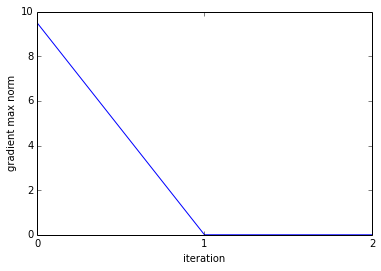

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([iteration['gradient_max_norm'] for iteration in iterations])
plt.xticks([iteration['iteration'] for iteration in iterations])
plt.xlabel('iteration')
plt.ylabel('gradient max norm')
plt.show()

Below is a brief report from the optimization:

In [7]:
problem.summary()['brief_report']

'Ceres Solver Report: Iterations: 2, Initial cost: 4.512500e+01, Final cost: 5.012552e-16, Termination: CONVERGENCE'